## The dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/duarteocarmo/anaconda/envs/DeepLearning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/duarteocarmo/anaconda/envs/DeepLearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
print('{} training examples.\n{} test examples'.format(len(train_data), len(test_data)))

8982 training examples.
2246 test examples


In [3]:
print('Example of a training datapoint:\n{}'.format(train_data[0]))

Example of a training datapoint:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## Preparing the data

In [4]:
# encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Building the network

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating Approach

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 382us/step - loss: 1.4885 - acc: 0.6644 - val_loss: 1.0823 - val_acc: 0.7590
Epoch 2/20
7982/7982 [==============================] - 2s 305us/step - loss: 0.7884 - acc: 0.8227 - val_loss: 0.8873 - val_acc: 0.8150
Epoch 3/20
7982/7982 [==============================] - 2s 275us/step - loss: 0.4963 - acc: 0.8894 - val_loss: 0.8804 - val_acc: 0.8200
Epoch 4/20
7982/7982 [==============================] - 2s 277us/step - loss: 0.3407 - acc: 0.9225 - val_loss: 0.8975 - val_acc: 0.8180
Epoch 5/20
7982/7982 [==============================] - 2s 279us/step - loss: 0.2574 - acc: 0.9410 - val_loss: 0.9636 - val_acc: 0.8240
Epoch 6/20
7982/7982 [==============================] - 2s 278us/step - loss: 0.2193 - acc: 0.9495 - val_loss: 1.0390 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 2s 279us/step - loss: 0.1933 - acc: 0.9515 - val_loss: 1.0974 - val_acc: 0.8080


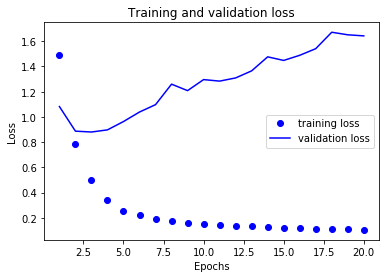

In [12]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

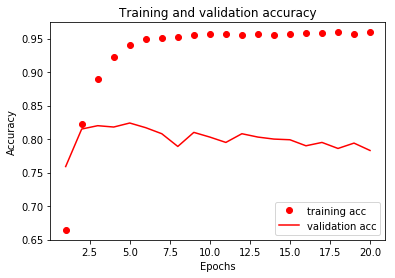

In [13]:
plt.clf()

acc = history.history['acc']
va_acc = history.history['val_acc']

plt.plot(epochs, acc, 'ro', label='training acc')
plt.plot(epochs, va_acc, 'r', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# since it starts overfitting after 9
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 147us/step - loss: 2.7913 - acc: 0.5048 - val_loss: 1.8183 - val_acc: 0.6280
Epoch 2/9
7982/7982 [==============================] - 1s 108us/step - loss: 1.5071 - acc: 0.6988 - val_loss: 1.3200 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.1029 - acc: 0.7739 - val_loss: 1.1339 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.8676 - acc: 0.8166 - val_loss: 1.0268 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.7004 - acc: 0.8487 - val_loss: 0.9636 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.5642 - acc: 0.8757 - val_loss: 0.9395 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.4551 - acc: 0.9065 - val_loss: 0.9210 - val_acc: 0.7990
Epoch 8

In [19]:
print('Loss: {}\nAccuracy: {}'.format(results[0], results[1]))

Loss: 0.9791217790792165
Accuracy: 0.7907390916655346


## Predictions on new data

In [20]:
predictions = model.predict(x_test)

In [24]:
print('Each prediction has shape: {}\n'.format(predictions[0].shape))
print('Example: {}\n'.format(predictions[0]))
print('Corresponds to a class {}.'.format(np.argmax(predictions[0])))

Each prediction has shape: (46,)

Example: [8.5185769e-05 2.6946322e-05 8.3282862e-07 9.8804235e-01 8.2385000e-03
 5.8812350e-07 2.7050239e-05 2.5604157e-05 2.4367259e-04 1.1605971e-05
 2.9226478e-05 1.5951479e-04 4.6195248e-05 7.6583194e-05 2.2439939e-05
 1.0398664e-05 2.1866473e-04 2.7013723e-06 1.6947515e-06 3.6795990e-04
 6.4968574e-04 5.7293655e-04 2.9904743e-06 1.4266354e-04 2.1698281e-05
 1.0702480e-05 1.1948734e-06 1.5220883e-05 4.0807049e-06 3.1032603e-05
 2.1764537e-05 2.3118604e-04 2.7808146e-06 1.2380393e-05 3.9874759e-04
 9.0581244e-07 3.2198957e-05 6.8182580e-06 1.6797574e-05 1.5126268e-04
 2.6600682e-07 1.5670938e-05 2.7722567e-06 1.5325684e-05 1.3988235e-07
 1.0728431e-06]

Corresponds to a class 3.


## Encoding labels as categories

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [28]:
# use 'sparse_categorical_entropy'
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])